**Import Libraries**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

**Load the data**

In [ ]:
data = load_breast_cancer() #refer: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

# data with features
X = data.data

# data class labels
y = data.target

**Print the number of data points, number of features and number of classes in the given data set.**

In [ ]:
print(f'Number of data points = {data.data.shape[0]}')
print(f'Number of features = {len(data.feature_names)}')
print(f'Number of classes = {len(data.target_names)}')

Number of data points = 569
Number of features = 30
Number of classes = 2


**Splitting data into Train and test sets with Stratified Sampling using train_test_split()**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=135)

In [ ]:
def getShape(name, dataset):
  print(f'Shape of {name} is {dataset.shape[0]} * {dataset.shape[1]}')

getShape('X', X)
getShape('X_train', X_train)
getShape('X_test', X_test)

Shape of X is 569 * 30
Shape of X_train is 455 * 30
Shape of X_test is 114 * 30


**Data Preprocessing using column standardisation. Use sklearn.preprocessing.StandardScaler().**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Implement Logistic Regression Using Gradient Descent: without using sklearn.**


In this algorithm, $n$ is the total number of datapoints in dataset. 
$\alpha$ is the learning rate to be used in gradient descent. For this work, just fix $\alpha = 0.001$.

The predicted value for data point $x$ is $y_{pred} = σ(w^{T}x + b)$, where $σ$ is a sigmoid function.

**ALGORITHM:**

<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each y_{true},y_{pred}}(y_{true}log(y_{pred})+(1-y_{true})log(1-y_{pred}))$
- for each epoch:

    - for each data point say $x_{i}$ in train:

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = \frac{1}{n}(x_i(σ((w^{(t)})^{T} x_i+b^{t}) - y_i))$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>)

           $ db^{(t)} = \frac{1}{n}(σ((w^{(t)})^{T} x_i+b^{t}) - y_i))$

        - Update weights and intercept using gradient descent  <br>
        $w^{(t+1)}← w^{(t)} - α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)} - α(db^{(t)}) $
    - predict the output for all test data points with updated weights. (write your function in def prediction())
    - calculate the log loss for train and test data points separately with the updated weights. Store these losses in the lists, train_loss and test_loss.
    - And if you wish, you can compare the previous train loss and the current train loss, if it is not updating, then
        you can stop the training
    -return the updated weights, training and test loss lists.


In [ ]:
def logloss(y_true, y_pred):
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    inner_summation = 0

    for i in range(len(y_true)):
      inner_summation += y_true[i] * np.log10(y_pred[i]) + (1 - y_true[i]) * np.log10(1 - y_pred[i])
    
    logloss = (-1) * ( 1 / len(y_true) ) * inner_summation

    return logloss

In [ ]:
def initialize_weights(inVec):
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of input vector.
    weights = np.zeros_like(inVec)

    #initialize bias to zero
    bias = 0

    return weights, bias

In [ ]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1 / (1 + np.exp(-z))

In [ ]:
# w should be a vector of size as input data point. Size of w and dw be same.
def gradient_dw(x, y, w, b, n):
  # In this function, we will compute the gradient w.r.to w
  dw = (1/n) * (x * sigmoid(np.dot(w, x) + b) - y)

  return dw    

In [ ]:
#b should be a scalar value
def gradient_db(x, y, w, b, n):
  # In this function, we will compute gradient w.r.to b 
  db = (1/n) * (sigmoid(np.dot(w, x) + b) - y)

  return db

**For the prediction, if activation_value > 0.5 then assign label = 1 else label = 0**

In [ ]:
# def predict(w, b, X):
#   # predicting the class label for a data point.
#   n = len(X)
#   z = np.dot(w, X) + b

#   if sigmoid(z) > 0.5:
#     return 1
#   else:
#     return 0

In [ ]:
def predict(w, b, X):
  # predicting the class label for a data point.
  n = len(X)
  z = np.dot(w, X) + b

  return sigmoid(z)

In [ ]:
def logistic_regression(X_train, y_train, X_test, y_test, epochs, alpha, threshold):
  # implement your algorithm
  weights, bias = initialize_weights(X_train[0])

  train_loss, test_loss = [], []
  n = len(X_train)

  # while(1):
  #   for epoch in range(epochs):
  #     for batch in range(n):
  #       dw = gradient_dw(X_train[batch], y_train[batch], weights, bias, n)
  #       db = gradient_db(X_train[batch], y_train[batch], weights, bias, n)

  #       weights -= alpha * dw
  #       bias -= alpha * db

  #     train_predict, test_predict = [], []

  #     for batch in range(len(X_train)):
  #       train_predict.append( predict(weights, bias, X_train[batch]) )
        
  #     for batch in range(len(X_test)):
  #       test_predict.append( predict(weights, bias, X_test[batch]) )

  #     train_loss.append( logloss(y_train, train_predict) )
  #     test_loss.append( logloss(y_test, test_predict) )

    
  for epoch in range(epochs):
    for batch in range(n):
      dw = gradient_dw(X_train[batch], y_train[batch], weights, bias, n)
      db = gradient_db(X_train[batch], y_train[batch], weights, bias, n)

      weights = weights + alpha * dw
      bias = bias + alpha * db

    train_predict, test_predict = [], []

    for batch in range(len(X_train)):
      train_predict.append( predict(weights, bias, X_train[batch]) )
    
    for batch in range(len(X_test)):
      test_predict.append( predict(weights, bias, X_test[batch]) )

    train_loss.append( logloss(y_train, train_predict) )
    test_loss.append( logloss(y_test, test_predict) )
  
  return train_loss, test_loss

**Plot your train and test loss vs epochs. Plot epoch number on X-axis and loss on Y-axis and make sure that the curve is converging**

In [ ]:
train_loss, test_loss = logistic_regression(X_train, y_train, X_test, y_test, 1000, 0.001, 0.0001)

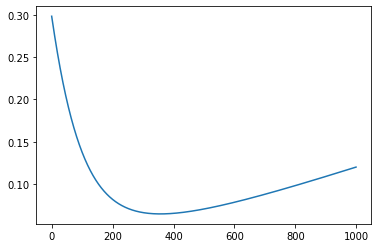

In [ ]:
import matplotlib.pyplot as plt
epoch_list = []

for epoch in range(1000):
  epoch_list.append(epoch)

plt.plot(epoch_list, test_loss)

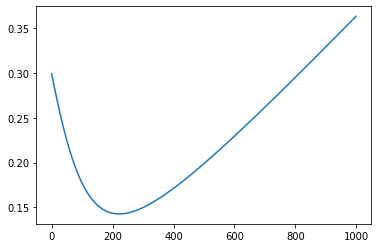

In [ ]:
plt.plot(epoch_list, train_loss)

**Compute the final accuracy on test dataset.**

**BONUS: Train your model with varying values of learning rates say ranging in $[0.1, 0.01, 0.001, 0.0001]$ and plot the performances.**